# Análisis de los accidentes

## Importar librerías

In [1]:
# Librerías básicas
import pandas as pd
import numpy as np

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configuraciones de estilo
sns.set(style="whitegrid")  # estilo de seaborn
plt.rcParams['figure.figsize'] = (10,6)  # tamaño de figuras por defecto


## Cargar CSV Limpio

In [4]:
df = pd.read_csv("../data/processed/accidentes_limpios_2024.csv", sep=';')
df.head()

,ID_ACCIDENTE,ANYO,MES,DIA_SEMANA,DIA_SEMANA_NOMBRE,HORA,PROVINCIA,COD_MUNICIPIO,ZONA,ZONA_AGRUPADA,...,PRIORI_HORIZ_STOP_NOMBRE,PRIORI_HORIZ_CEDA_NOMBRE,PRIORI_MARCAS_NOMBRE,PRIORI_PEA_NO_ELEV_NOMBRE,PRIORI_PEA_ELEV_NOMBRE,PRIORI_MARCA_CICLOS_NOMBRE,PRIORI_CIRCUNSTANCIAL_NOMBRE,PRIORI_OTRA_NOMBRE,ACERA_NOMBRE,TRAZADO_PLANTA_NOMBRE
0,1,2024,1,3,MIÉRCOLES,22,Araba/Álava,0,1,1,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,No aplica,Recta
1,2,2024,1,6,SÁBADO,23,Araba/Álava,1036,1,1,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,No aplica,Curva sin señalizar
2,3,2024,1,7,DOMINGO,1,Araba/Álava,0,1,1,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,No aplica,Recta
3,4,2024,1,7,DOMINGO,8,Araba/Álava,0,1,1,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,No aplica,Curva sin señalizar
4,5,2024,1,4,JUEVES,17,Araba/Álava,0,1,1,...,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,Sin especificar,No aplica,Recta


## Información básica del dataset

In [5]:
# Dimensiones del dataset
print("Número de filas y columnas:", df.shape)

# Tipos de datos y nulos
df.info()

# Estadísticas descriptivas para columnas numéricas
df.describe()

Número de filas y columnas: (101996, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101996 entries, 0 to 101995
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID_ACCIDENTE                  101996 non-null  int64  
 1   ANYO                          101996 non-null  int64  
 2   MES                           101996 non-null  int64  
 3   DIA_SEMANA                    101996 non-null  int64  
 4   DIA_SEMANA_NOMBRE             101996 non-null  object 
 5   HORA                          101996 non-null  int64  
 6   PROVINCIA                     101996 non-null  object 
 7   COD_MUNICIPIO                 101996 non-null  int64  
 8   ZONA                          101996 non-null  int64  
 9   ZONA_AGRUPADA                 101996 non-null  int64  
 10  CARRETERA                     101996 non-null  object 
 11  KM                            38814 non-null   float64
 12  SEN

,ID_ACCIDENTE,ANYO,MES,DIA_SEMANA,HORA,COD_MUNICIPIO,ZONA,ZONA_AGRUPADA,KM,SENTIDO_1F,TITULARIDAD_VIA,TIPO_VIA,TIPO_ACCIDENTE,TOTAL_MU24H,TOTAL_HG24H,TOTAL_HL24H,TOTAL_VICTIMAS_24H,TOTAL_VEHICULOS,MUERTOS_VEHICULOS,DIF_MUERTOS
count,101996.000000,101996.0,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,38814.000000,101996.000000,101996.000000,101996.000000,101961.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000,101996.000000
mean,50998.500000,2024.0,6.571022,3.873250,13.711940,21182.727058,2.284246,1.649280,99.194025,3.322424,3.873221,8.457038,7.142398,0.014922,0.096131,1.226528,1.337582,1.728813,0.014844,0.000078
std,29443.853365,0.0,3.392339,1.944702,5.304717,15639.183504,0.951911,0.477198,225.912973,1.135597,16.538012,3.296533,5.680241,0.133555,0.333475,0.855379,0.835522,0.728143,0.133197,0.008856
min,1.000000,2024.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,25499.750000,2024.0,4.000000,2.000000,10.000000,8019.000000,1.000000,1.000000,3.500000,2.000000,3.000000,6.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,50998.500000,2024.0,7.000000,4.000000,14.000000,23050.000000,3.000000,2.000000,13.600000,4.000000,4.000000,9.000000,4.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000
75%,76497.250000,2024.0,10.000000,5.000000,18.000000,32054.000000,3.000000,2.000000,69.987500,4.000000,4.000000,9.000000,10.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000
max,101996.000000,2024.0,12.000000,7.000000,23.000000,52001.000000,4.000000,2.000000,9999.000000,4.000000,999.000000,14.000000,20.000000,6.000000,9.000000,40.000000,49.000000,32.000000,6.000000,1.000000


## Revisión rápida de valores únicos en variables categóricas

In [10]:
# Ejemplo con algunas columnas categóricas
categoricas = ['TIPO_ACCIDENTE', 'TIPO_VIA', 'DIA_SEMANA']  # ajusta según tu dataset

for col in categoricas:
    print(f"\nValores únicos en {col}:")
    print(df[col].value_counts())



Valores únicos en TIPO_ACCIDENTE:
TIPO_ACCIDENTE
2.0     22176
4.0     17279
7.0     12491
3.0      8851
10.0     8454
19.0     4805
20.0     4618
9.0      3664
1.0      3329
16.0     3287
12.0     2858
6.0      2469
5.0      1995
18.0     1832
15.0     1416
14.0     1091
8.0       713
17.0      336
13.0      219
11.0       78
Name: count, dtype: int64

Valores únicos en TIPO_VIA:
TIPO_VIA
9     48432
6     20281
14    17519
3      8136
2      3316
5      1769
10     1055
1       425
7       384
8       322
11      134
12       87
4        74
13       62
Name: count, dtype: int64

Valores únicos en DIA_SEMANA:
DIA_SEMANA
5    16378
1    15270
4    15257
2    15146
3    14889
6    13483
7    11573
Name: count, dtype: int64


## Distribuciones de variables individuales

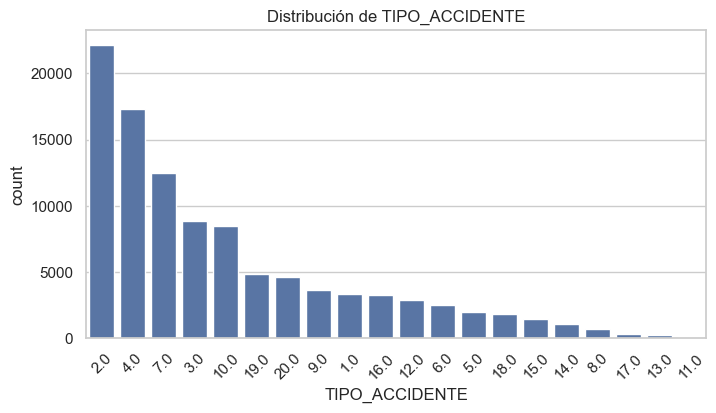

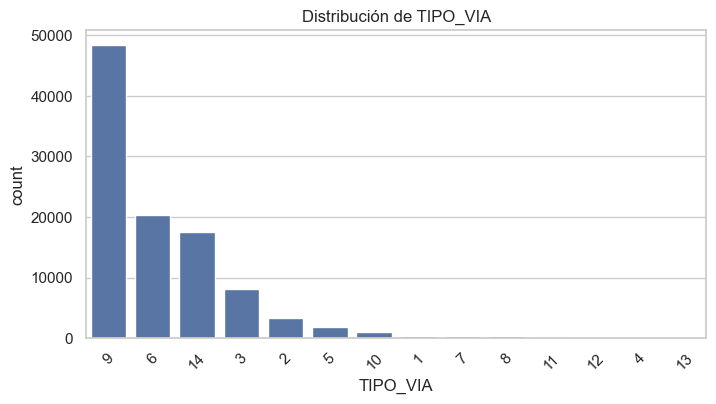

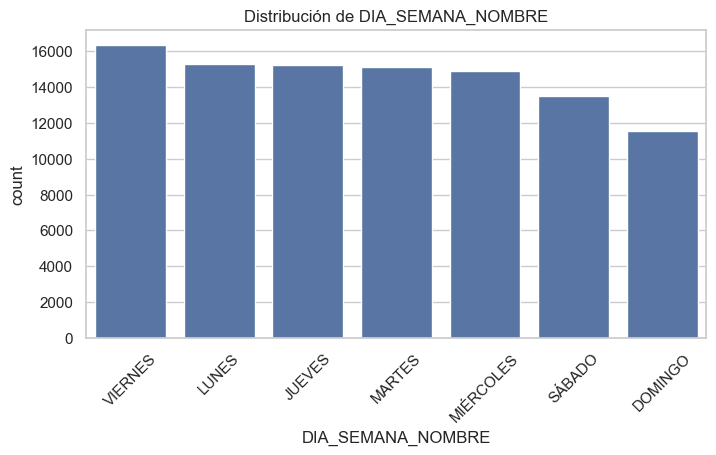

In [13]:
categoricas = ['TIPO_ACCIDENTE', 'TIPO_VIA', 'DIA_SEMANA_NOMBRE']  # usa los nombres reales de tu CSV

for col in categoricas:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()


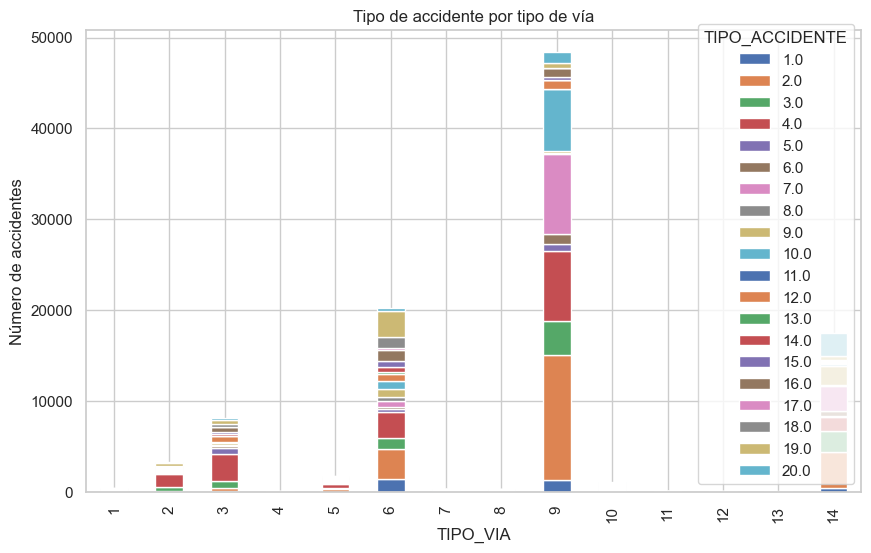

In [16]:
pd.crosstab(df['TIPO_VIA'], df['TIPO_ACCIDENTE']).plot(kind='bar', stacked=True)
plt.title("Tipo de accidente por tipo de vía")
plt.ylabel("Número de accidentes")
plt.show()
